**CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology has six major phases**

1. Business Understanding

2. Data Understanding

3. Data Preparation

4. Modeling

5. Evaluation

6. Deployment


In [1]:
# Install the Kaggle package
!pip install kaggle

# Create a directory to store the kaggle.json file
!mkdir ~/.kaggle

In [2]:
# Upload the kaggle.json file from your local system
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riship3499","key":"f05439e4bf2d33cd99322d4f479bfb47"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Phase 1: Business Understanding
Goal:
In this step, we identify the problem we are trying to solve and determine the objectives from the business's point of view. Understanding the business context helps us frame the data analysis appropriately.

In [8]:
# Download the dataset using the Kaggle API
# This will download the "House Prices" dataset from Kaggle into your Colab environment
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 56.9MB/s]


In [9]:
# Unzip the dataset
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [11]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('train.csv')  # This loads the training data

# Display the first few rows of the dataset
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Phase 2: Data Understanding

Step 1: Basic Data Exploration

In [12]:
# Check the structure of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# View the data types of each feature
data.info()

# Describe the dataset to get basic statistics
data.describe()


Dataset contains 1460 rows and 81 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQu

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Step 2: Check for Missing Values

In [13]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display columns that have missing values
missing_values = missing_values[missing_values > 0]
print(missing_values)


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Step 3: Initial Data Visualization

1.  Target Variable Distribution

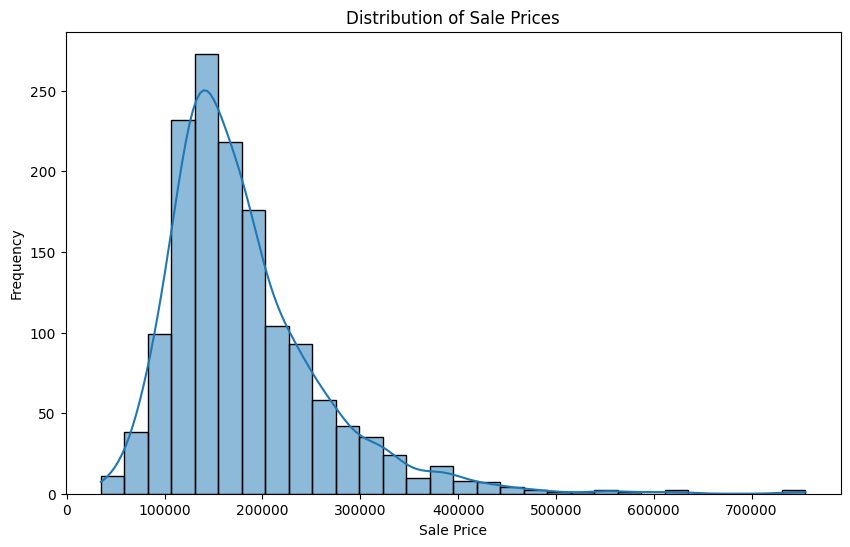

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], bins=30, kde=True)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()


 2. Feature vs. Target Relationship

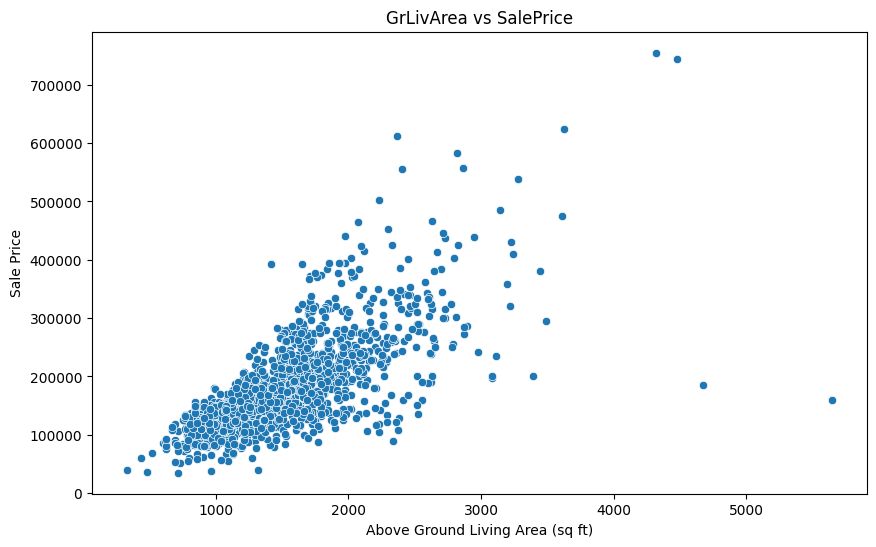

In [15]:
# Scatter plot between GrLivArea and SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
plt.title("GrLivArea vs SalePrice")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.show()


**Key Take aways from Data Understanding**:
1. **Basic Data Overview**: We’ve explored the structure and basic statistics of the dataset.

2. **Missing Values**: Identified columns with missing values which will require special handling in the next phase.

3. **Initial Visual Exploration**: Visualized important features and the target variable to spot patterns and correlations. We can start seeing how some features relate to the target variable.

**Phase 3: Data Preparation**

The Data Preparation phase is where we get the dataset ready for modeling. This step is often the most time-consuming and involves tasks like handling missing values, transforming data, creating new features, and selecting the relevant ones for the model.

Step 1.  Handling Missing Values

We need to decide how to handle missing values based on the data understanding phase. Common strategies include:

1. Removing rows or columns with too many missing values.
2. Imputing missing values with the mean, median, or mode.

In [16]:
# Impute missing values for numerical columns using the median
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

# Impute missing values for categorical columns with the mode (most frequent value)
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

# Now, check if any missing values are left
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


**Step 2: Encoding Categorical Variables**



In [17]:
# Use one-hot encoding to convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['Neighborhood', 'GarageType', 'SaleCondition'], drop_first=True)

# Check the new shape of the dataset after encoding
print(data.shape)


(1460, 112)


**Step 3: Feature Scaling**

In [18]:
from sklearn.preprocessing import StandardScaler

# Select the features that need scaling
features_to_scale = ['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on selected features
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Check the first few rows to verify the scaling
data[features_to_scale].head()


,LotArea,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea
0,-0.207142,0.370333,-0.459303,-0.793434,1.161852,0.351000
1,-0.091886,-0.482512,0.466465,0.257140,-0.795163,-0.060731
2,0.073480,0.515013,-0.313369,-0.627826,1.189351,0.631726
3,-0.096897,0.383659,-0.687324,-0.521734,0.937276,0.790804
4,0.375148,1.299326,0.199680,-0.045611,1.617877,1.698485


**Step 4: Feature Selection**

Encoding Categorical Variables

In [20]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Perform one-hot encoding for categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Verify that the categorical columns have been encoded
data_encoded.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 246 entries, Id to SaleType_WD
dtypes: bool(208), float64(9), int64(29)
memory usage: 730.1 KB


**Step 5: Feature Scaling**

Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Check the scaled data
data_encoded[numerical_cols].head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843


In [22]:
# Compute the correlation matrix
corr_matrix = data_encoded.corr()

# Get the top correlated features with SalePrice
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(15)

# Display the top correlated features
print(top_corr_features)


SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
Foundation_PConc    0.497734
MasVnrArea          0.472614
Fireplaces          0.466929
GarageYrBlt         0.466754
Name: SalePrice, dtype: float64


### **Phase 4: Modeling**



 In this phase, we apply different machine learning models to our dataset and train them to make predictions. The key tasks in this phase are:

**Selecting the Right Model**: Choose suitable models based on the problem type (regression in this case).

**Training the Model**: Use the prepared dataset to train the model.

**Tuning Model Parameters**: Optimize the hyperparameters to improve performance.
Evaluating Model Performance: Use metrics to evaluate how well the model is performing.


**Step 1: Train-Test Split**

In [23]:
from sklearn.model_selection import train_test_split

# Define the target variable (SalePrice) and features
X = data_encoded.drop('SalePrice', axis=1)
y = data_encoded['SalePrice']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (1168, 245), Test set: (292, 245)


**Step 2: Model Selection**

For this regression problem, we will try several common regression models:

1. Linear Regression

2. Random Forest Regressor

3. Gradient Boosting Regressor

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Initialize models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
gradient_boost = GradientBoostingRegressor(random_state=42)

# Train the models
linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boost.fit(X_train, y_train)

# Predict on the test set
linear_pred = linear_reg.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
gradient_boost_pred = gradient_boost.predict(X_test)

# Evaluate models using Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test, linear_pred)
mae_rf = mean_absolute_error(y_test, random_forest_pred)
mae_gb = mean_absolute_error(y_test, gradient_boost_pred)

print(f"Linear Regression MAE: {mae_linear}")
print(f"Random Forest MAE: {mae_rf}")
print(f"Gradient Boosting MAE: {mae_gb}")


Linear Regression MAE: 10593114.41110427
Random Forest MAE: 0.22424335347670332
Gradient Boosting MAE: 0.21925383590962036


# Phase 5: Evaluation

In the Evaluation phase, we rigorously assess the performance of the model(s) trained in the previous phase. The goal is to ensure that the model meets the business objectives and delivers accurate, reliable predictions. We can also evaluate its ability to generalize to new data (i.e., test set or unseen data).



Step 1: Evaluating the Best Model

We’ll evaluate the model using:

1. MAE (Mean Absolute Error)

2. RMSE (Root Mean Squared Error)

3. R² Score (Coefficient of determination

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming Gradient Boosting Regressor was the best-performing model
best_model = gradient_boost

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.21925383590962036
Root Mean Squared Error (RMSE): 0.35246175687435816
R² Score: 0.8978546873566133


**Step 2: Visualizing Model Performance**

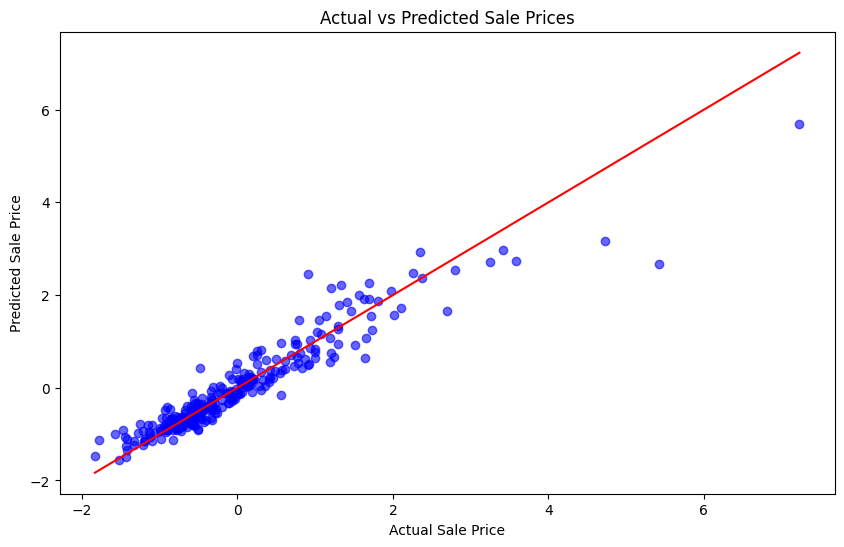

In [26]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect predictions
plt.show()


**Step 3: Check for Overfitting or Underfitting**

In [27]:
# Predict on the training set
y_train_pred = best_model.predict(X_train)

# Calculate training set MAE and RMSE
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"Training MAE: {train_mae}")
print(f"Training RMSE: {train_rmse}")

# Compare with test set metrics
print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse}")


Training MAE: 0.12665518940310844
Training RMSE: 0.17241904735727212
Test MAE: 0.21925383590962036
Test RMSE: 0.35246175687435816


# Phase 6: Deployment

The Deployment phase involves making the model available for real-world use. In a business context, this could mean integrating the model into a system where it can make predictions on new data, or it could involve presenting the results to stakeholders.

For our example, we will simulate a simple deployment by:

1. Saving the trained model for future use.

2. Demonstrating how to load the model and use it to make predictions on new, unseen data.



Step 1: Save the Trained Model

In [31]:
import joblib

# Save the best-tuned model to a file
joblib.dump(best_model, 'house_price_prediction_model.pkl')

print("Model saved successfully!")


Model saved successfully!


Step 2: Load the Trained Model and Make Predictions

In [32]:
# Load the saved model from file
loaded_model = joblib.load('house_price_prediction_model.pkl')

# Make a prediction on the test set
new_predictions = loaded_model.predict(X_test)

# Display the first few predictions
print("Predictions on test set:", new_predictions[:5])


Predictions on test set: [-0.48411001  1.86582312 -0.70131426 -0.45377012  1.92286174]
